<a href="https://colab.research.google.com/github/THANNAGA/generalized_Lotka_Volterra_Interactive_Activation/blob/main/gLIA_discrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda
Epoch 0, Loss: 0.0806, Train Acc: 0.0543, Test Acc: 0.0308
Epoch 10, Loss: 0.0033, Train Acc: 0.4405, Test Acc: 0.3460
Epoch 20, Loss: 0.0021, Train Acc: 0.0426, Test Acc: 0.0617
Epoch 30, Loss: 0.0019, Train Acc: 0.1086, Test Acc: 0.1096
Epoch 40, Loss: 0.0015, Train Acc: 0.6490, Test Acc: 0.6475
Epoch 50, Loss: 0.0013, Train Acc: 0.0029, Test Acc: 0.0103
Epoch 60, Loss: 0.0012, Train Acc: 0.1101, Test Acc: 0.1302
Epoch 70, Loss: 0.0180, Train Acc: 0.0000, Test Acc: 0.0000
Epoch 80, Loss: 0.0011, Train Acc: 0.0044, Test Acc: 0.0034
Epoch 90, Loss: 0.0011, Train Acc: 0.0294, Test Acc: 0.0171
Epoch 100, Loss: 0.0011, Train Acc: 0.0000, Test Acc: 0.0000
Epoch 110, Loss: 0.0011, Train Acc: 0.0015, Test Acc: 0.0000
Epoch 120, Loss: 0.0010, Train Acc: 0.0162, Test Acc: 0.0069
Epoch 130, Loss: 0.0010, Train Acc: 0.0837, Test Acc: 0.0685
Epoch 140, Loss: 0.0010, Train Acc: 0.0000, Test Acc: 0.0000
Epoch 150, Loss: 0.0011, Train Acc: 0.0954, Test Acc: 0.0651
Epoch 160, Loss:

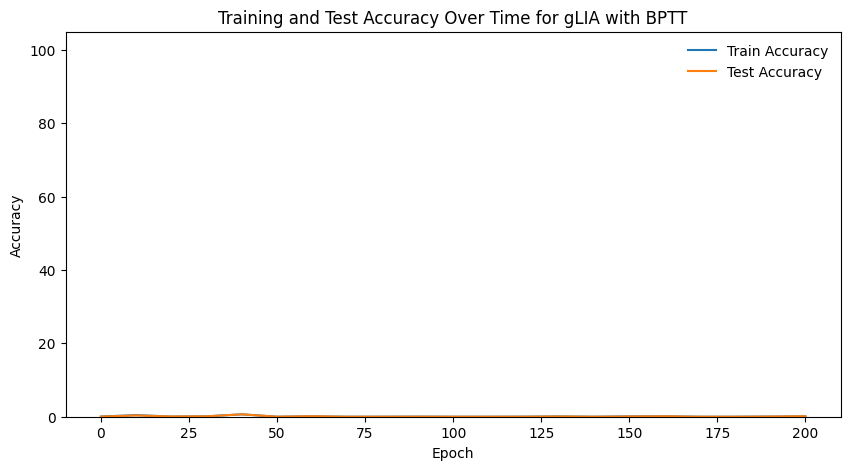

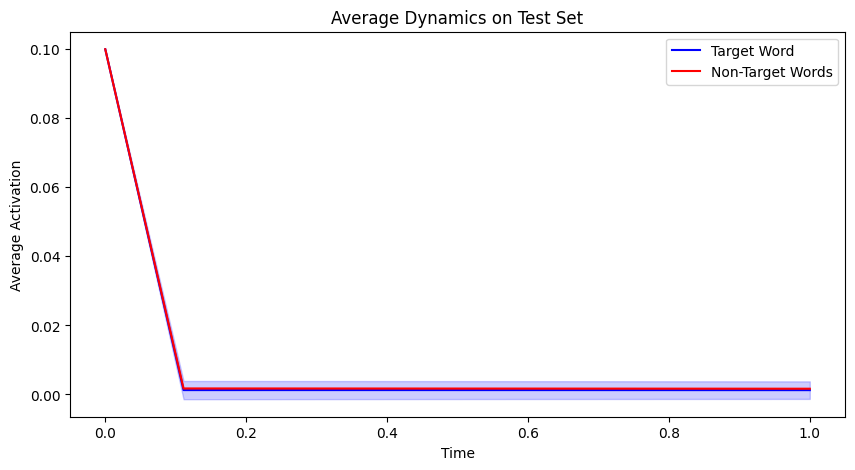

7239

In [35]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import gc

# Device configuration (ensure GPU usage)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Word list (subset for simplicity)
full_wordlist = [
    "the", "of", "to", "and", "a", "in", "is", "it", "you", "that",
    "he", "was", "for", "on", "are", "with", "as", "I", "his", "they",
    "be", "at", "one", "have", "this", "from", "or", "had", "by", "not",
    "word", "but", "what", "some", "we", "can", "out", "other", "were", "all",
    "there", "when", "up", "use", "your", "how", "said", "an", "each", "she",
    "which", "do", "their", "time", "if", "will", "way", "about", "many", "then",
    "them", "write", "would", "like", "so", "these", "her", "long", "make", "thing",
    "see", "him", "two", "has", "look", "more", "day", "could", "go", "come",
    "did", "number", "sound", "no", "most", "people", "my", "over", "know", "water",
    "than", "call", "first", "who", "may", "down", "side", "been", "now", "find",
    "any", "new", "work", "part", "take", "get", "place", "made", "live", "where",
    "after", "back", "little", "only", "round", "man", "year", "came", "show", "every",
    "good", "me", "give", "our", "under", "name", "very", "through", "just", "form",
    "sentence", "great", "think", "say", "help", "low", "line", "differ", "turn", "cause",
    "much", "mean", "before", "move", "right", "boy", "old", "too", "same", "tell",
    "does", "set", "three", "want", "air", "well", "also", "play", "small", "end",
    "put", "home", "read", "hand", "port", "large", "spell", "add", "even", "land",
    "here", "must", "big", "high", "such", "follow", "act", "why", "ask", "men",
    "change", "went", "light", "kind", "off", "need", "house", "picture", "try", "us",
    "again", "animal", "point", "mother", "world", "near", "build", "self", "earth", "father",
    "head", "stand", "own", "page", "should", "country", "found", "answer", "school", "grow",
    "study", "still", "learn", "plant", "cover", "food", "sun", "four", "between", "state",
    "keep", "eye", "never", "last", "let", "thought", "city", "tree", "cross", "farm",
    "hard", "start", "might", "story", "saw", "far", "sea", "draw", "left", "late",
    "run", "dont", "while", "press", "close", "night", "real", "life", "few", "north",
    "open", "seem", "together", "next", "white", "children", "begin", "got", "walk", "example",
    "ease", "paper", "group", "always", "music", "those", "both", "mark", "often", "letter",
    "until", "mile", "river", "car", "feet", "care", "second", "book", "carry", "took",
    "science", "eat", "room", "friend", "began", "idea", "fish", "mountain", "stop", "once",
    "base", "hear", "horse", "cut", "sure", "watch", "color", "face", "wood", "main",
    "enough", "plain", "girl", "usual", "young", "ready", "above", "ever", "red", "list",
    "though", "feel", "talk", "bird", "soon", "body", "dog", "family", "direct", "pose",
    "leave", "song", "measure", "door", "product", "black", "short", "numeral", "class", "wind",
    "question", "happen", "complete", "ship", "area", "half", "rock", "order", "fire", "south",
    "problem", "piece", "told", "knew", "pass", "since", "top", "whole", "king", "space",
    "heard", "best", "hour", "better", "true", "during", "hundred", "five", "remember", "step",
    "early", "hold", "west", "ground", "interest", "reach", "fast", "verb", "sing", "listen",
    "six", "table", "travel", "less", "morning", "ten", "simple", "several", "vowel", "toward",
    "war", "lay", "against", "pattern", "slow", "center", "love", "person", "money", "serve",
    "appear", "road", "map", "rain", "rule", "govern", "pull", "cold", "notice", "voice",
    "unit", "power", "town", "fine", "certain", "fly", "fall", "lead", "cry", "dark",
    "machine", "note", "wait", "plan", "figure", "star", "box", "noun", "field", "rest",
    "correct", "able", "pound", "done", "beauty", "drive", "stood", "contain", "front", "teach",
    "week", "final", "gave", "green", "oh", "quick", "develop", "ocean", "warm", "free",
    "minute", "strong", "special", "mind", "behind", "clear", "tail", "produce", "fact", "street",
    "inch", "multiply", "nothing", "course", "stay", "wheel", "full", "force", "blue", "object",
    "decide", "surface", "deep", "moon", "island", "foot", "system", "busy", "test", "record",
    "boat", "common", "gold", "possible", "plane", "stead", "dry", "wonder", "laugh", "thousand",
    "ago", "ran", "check", "game", "shape", "equate", "hot", "miss", "brought", "heat",
    "snow", "tire", "bring", "yes", "distant", "fill", "east", "paint", "language", "among",
    "grand", "ball", "yet", "wave", "drop", "heart", "am", "present", "heavy", "dance",
    "engine", "position", "arm", "wide", "sail", "material", "size", "vary", "settle", "speak",
    "weight", "general", "ice", "matter", "circle", "pair", "include", "divide", "syllable", "felt",
    "perhaps", "pick", "sudden", "count", "square", "reason", "length", "represent", "art", "subject",
    "region", "energy", "hunt", "probable", "bed", "brother", "egg", "ride", "cell", "believe",
    "fraction", "forest", "sit", "race", "window", "store", "summer", "train", "sleep", "prove",
    "lone", "leg", "exercise", "wall", "catch", "mount", "wish", "sky", "board", "joy",
    "winter", "sat", "written", "wild", "instrument", "kept", "glass", "grass", "cow", "job",
    "edge", "sign", "visit", "past", "soft", "fun", "bright", "gas", "weather", "month",
    "million", "bear", "finish", "happy", "hope", "flower", "clothe", "strange", "gone", "jump",
    "baby", "eight", "village", "meet", "root", "buy", "raise", "solve", "metal", "whether",
    "push", "seven", "paragraph", "third", "shall", "held", "hair", "describe", "cook", "floor",
    "either", "result", "burn", "hill", "safe", "cat", "century", "consider", "type", "law",
    "bit", "coast", "copy", "phrase", "silent", "tall", "sand", "soil", "roll", "temperature",
    "finger", "industry", "value", "fight", "lie", "beat", "excite", "natural", "view", "sense",
    "ear", "else", "quite", "broke", "case", "middle", "kill", "son", "lake", "moment",
    "scale", "loud", "spring", "observe", "child", "straight", "consonant", "nation", "dictionary", "milk",
    "speed", "method", "organ", "pay", "age", "section", "dress", "cloud", "surprise", "quiet",
    "stone", "tiny", "climb", "cool", "design", "poor", "lot", "experiment", "bottom", "key",
    "iron", "single", "stick", "flat", "twenty", "skin", "smile", "crease", "hole", "trade",
    "melody", "trip", "office", "receive", "row", "mouth", "exact", "symbol", "die", "least",
    "trouble", "shout", "except", "wrote", "seed", "tone", "join", "suggest", "clean", "break",
    "lady", "yard", "rise", "bad", "blow", "oil", "blood", "touch", "grew", "cent",
    "mix", "team", "wire", "cost", "lost", "brown", "wear", "garden", "equal", "sent",
    "choose", "fell", "fit", "flow", "fair", "bank", "collect", "save", "control", "decimal",
    "gentle", "woman", "captain", "practice", "separate", "difficult", "doctor", "please", "protect", "noon",
    "whose", "locate", "ring", "character", "insect", "caught", "period", "indicate", "radio", "spoke",
    "atom", "human", "history", "effect", "electric", "expect", "crop", "modern", "element", "hit",
    "student", "corner", "party", "supply", "bone", "rail", "imagine", "provide", "agree", "thus",
    "capital", "wont", "chair", "danger", "fruit", "rich", "thick", "soldier", "process", "operate",
    "guess", "necessary", "sharp", "wing", "create", "neighbor", "wash", "bat", "rather", "crowd",
    "corn", "compare", "poem", "string", "bell", "depend", "meat", "rub", "tube", "famous",
    "dollar", "stream", "fear", "sight", "thin", "triangle", "planet", "hurry", "chief", "colony",
    "clock", "mine", "tie", "enter", "major", "fresh", "search", "send", "yellow", "gun",
    "allow", "print", "dead", "spot", "desert", "suit", "current", "lift", "rose", "continue",
    "block", "chart", "hat", "sell", "success", "company", "subtract", "event", "particular", "deal",
    "swim", "term", "opposite", "wife", "shoe", "shoulder", "spread", "arrange", "camp", "invent",
    "cotton", "born", "determine", "quart", "nine", "truck", "noise", "level", "chance", "gather",
    "shop", "stretch", "throw", "shine", "property", "column", "molecule", "select", "wrong", "gray",
    "repeat", "require", "broad", "prepare", "salt", "nose", "plural", "anger", "claim", "continent",
    "oxygen", "sugar", "death", "pretty", "skill", "women", "season", "solution", "magnet", "silver",
    "thank", "branch", "match", "suffix", "especially", "fig", "afraid", "huge", "sister", "steel",
    "discuss", "forward", "similar", "guide", "experience", "score", "apple", "bought", "led", "pitch",
    "coat", "mass", "card", "band", "rope", "slip", "win", "dream", "evening", "condition",
    "feed", "tool", "total", "basic", "smell", "valley", "nor", "double", "seat", "arrive",
    "master", "track", "parent", "shore", "division", "sheet", "substance", "favor", "connect", "post",
    "spend", "chord", "fat", "glad", "original", "share", "station", "dad", "bread", "charge",
    "proper", "bar", "offer", "segment", "slave", "duck", "instant", "market", "degree", "populate",
    "chick", "dear", "enemy", "reply", "drink", "occur", "support", "speech", "nature", "range",
    "steam", "motion", "path", "liquid", "log", "meant", "quotient", "teeth", "shell", "neck"
]

def buildLetters(wordlist):
    allletters = []
    for i, word in enumerate(wordlist):
        letters = [let + str(j + 1) for j, let in enumerate(word)]
        allletters += letters
    letterlist = sorted(list(set(allletters)))
    return letterlist

def buildList(numwords=10, lenwords=2):
    wordlist = [word for word in full_wordlist if len(word) > lenwords][:numwords]
    letterlist = buildLetters(wordlist)
    return wordlist, letterlist + wordlist

# Lexicon and setup
n_words = 1000
n_exemplars_per_word = 100
batchsize = 200
words, tokens = buildList(numwords=n_words)
n = len(tokens)
lexicon = words
n_letters = 26
max_word_length = max(len(word) for word in lexicon)
n_positions = max_word_length
input_size = n_positions * n_letters
letter_to_idx = {chr(65 + i): i for i in range(26)}

def generate_exemplars(n_exemplars_per_word=5):
    inputs = []
    targets = []
    sca, eps = 2, 0.2
    for word_idx, word in enumerate(lexicon):
        for _ in range(n_exemplars_per_word):
            input_vector = torch.zeros(1, input_size, device=device)  # Move to device
            for pos, letter in enumerate(word.upper()):
                letter_idx = letter_to_idx[letter]
                vector_idx = pos * n_letters + letter_idx
                scale = torch.rand(1, device=device) * sca + 0.5
                noise = torch.randn(1, device=device) * eps
                value = max(0, min(1, 1.0 * scale + noise))
                input_vector[0, vector_idx] = value
            inputs.append(input_vector)
            target = torch.zeros(n_words, device=device)
            target[word_idx] = 1.0
            targets.append(target)
    inputs = torch.cat(inputs, dim=0)
    targets = torch.stack(targets)
    return inputs, targets

# Generate and split data
inputs, targets = generate_exemplars(n_exemplars_per_word)
total_exemplars = inputs.shape[0]
indices = torch.randperm(total_exemplars, device=device)  # GPU-compatible
train_size = int(0.7 * total_exemplars)
train_indices = indices[:train_size]
test_indices = indices[train_size:]
train_inputs, train_targets = inputs[train_indices], targets[train_indices]
test_inputs, test_targets = inputs[test_indices], targets[test_indices]
train_dataset = TensorDataset(train_inputs, train_targets)
test_dataset = TensorDataset(test_inputs, test_targets)
train_loader = DataLoader(train_dataset, batch_size=batchsize, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batchsize, shuffle=False)

# Model definitions
class GLV_Sym(nn.Module):
    def __init__(self):
        super(GLV_Sym, self).__init__()
        small = 1 / (1000 * n)
        self.r = torch.ones(input_size + n_words, device=device) * 0.1
        n_total = input_size + n_words
        self.A = -0.0001 * torch.ones(n_total, n_total, device=device)
        for i, word in enumerate(lexicon):
            word_idx = n_letters + i
            for p, letter in enumerate(word):
                letter = letter.upper()
                letter_idx = letter_to_idx[letter] + p * 26
                if letter_idx <= word_idx:
                    self.A[word_idx, letter_idx] = small
                if word_idx <= letter_idx:
                    self.A[letter_idx, word_idx] = small
            for j in range(n_words):
                if i != j and (n_letters + j) <= (n_letters + i):
                    self.A[n_letters + i, n_letters + j] = -5 * small
        self.lower_A = nn.Parameter(torch.tril(self.A, diagonal=-1))

    def forward(self, t, x):
        A = self.lower_A + self.lower_A.t() - torch.diag(self.lower_A.diagonal())
        interaction = torch.matmul(x, A)
        dx_dt = x * (self.r + interaction)
        return dx_dt

class GLV(nn.Module):
    def __init__(self):
        super(GLV, self).__init__()
        small = 1 / (1000 * n)
        self.r = torch.ones(input_size + n_words, device=device) * 0.1 #* small
        n_total = input_size + n_words
        A = torch.zeros(n_total, n_total, device=device)
        for i, word in enumerate(lexicon):
            word_idx = n_letters + i
            for p, letter in enumerate(word):
                letter = letter.upper()
                letter_idx = letter_to_idx[letter] + p * 26
                A[word_idx, letter_idx] = small
                A[letter_idx, word_idx] = small
            for j in range(n_words):
                if i != j:
                    A[n_letters + i, n_letters + j] = -5 * small
        self.A = nn.Parameter(A)

    def forward(self, t, x):
        interaction = torch.matmul(x, self.A)
        dx_dt = x * (self.r + interaction)
        return dx_dt

class IAM(nn.Module):
    def __init__(self):
        super(IAM, self).__init__()
        small = 1 / (1000 * n)
        self.r = torch.ones(input_size + n_words, device=device) * 0.1
        n_total = input_size + n_words
        A = torch.zeros(n_total, n_total, device=device)
        for i, word in enumerate(lexicon):
            word_idx = n_letters + i
            for p, letter in enumerate(word):
                letter = letter.upper()
                letter_idx = letter_to_idx[letter] + p * 26
                A[word_idx, letter_idx] = small
                A[letter_idx, word_idx] = small
            for j in range(n_words):
                if i != j:
                    A[n_letters + i, n_letters + j] = -5 * small
        self.A = nn.Parameter(A)

    def forward(self, t, x):
        net_input = torch.matmul(x, self.A)
        decay = -0.1 * x
        excitation = (1.0 - x) * torch.relu(net_input)
        inhibition = x * torch.relu(-net_input)
        dx_dt = self.r * (excitation - inhibition) + decay
        return dx_dt

# Model selection
Symmetric = True
mode = "gLIA"#"IA"  # Options: "gLIA", "IA"
if mode == "gLIA":
    model = GLV_Sym().to(device) if Symmetric else GLV().to(device)
else:
    model = IAM().to(device)

# Discretization parameters
steps = 10 #if Symmetric else 50
dt = 1.0 / (steps - 1) #if Symmetric else 10.0 / (steps - 1)

def discrete_step_with_history(model, x0, steps, dt):
    x = x0
    history = [x]
    for _ in range(steps - 1):  # -1 since initial state is included
        dx_dt = model(None, x)
        x = x + dt * dx_dt
        if isinstance(model, IAM):
            x = torch.clamp(x, 0, 1)
        history.append(x)
    return torch.stack(history)  # Shape: [steps, batch_size, n]

def compute_accuracy(model, data_loader, steps, dt):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_inputs, batch_targets in data_loader:
            batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
            initial_words = torch.ones(batch_inputs.size(0), n_words, device=device) * 0.1
            initial_states = torch.cat([batch_inputs, initial_words], dim=1)
            states = discrete_step_with_history(model, initial_states, steps, dt)
            final_state = states[-1]
            _, a_w_final = final_state.split([input_size, n_words], dim=1)
            predicted = torch.argmax(a_w_final, dim=1)
            true = torch.argmax(batch_targets, dim=1)
            correct += (predicted == true).float().sum().item()
            total += batch_targets.size(0)
    return 100 * correct / total

def negative_definite_penalty(A):
    eigvals, _ = torch.linalg.eigh(A)
    real_eigvals = eigvals[torch.isfinite(eigvals)]
    nd_penalty = torch.sum(torch.clamp(real_eigvals, min=0))
    return nd_penalty

# Training with BPTT
alpha = 0.1
l_rate = 0.001
epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr=l_rate)
train_accs = []
test_accs = []

def train_with_bptt(model, train_loader, epochs, steps, dt):
    model.train()
    for epoch in range(epochs):
        gc.collect()
        total_loss = 0.0
        for batch_inputs, batch_targets in train_loader:
            batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
            optimizer.zero_grad()
            initial_words = torch.ones(batch_inputs.size(0), n_words, device=device) * 0.1
            initial_states = torch.cat([batch_inputs, initial_words], dim=1)
            states = discrete_step_with_history(model, initial_states, steps, dt)
            final_state = states[-1]
            _, a_w_final = final_state.split([input_size, n_words], dim=1)
            loss = nn.MSELoss()(a_w_final, batch_targets)
            if isinstance(model, GLV_Sym):
                A = model.lower_A + model.lower_A.t() - torch.diag(model.lower_A.diagonal())
                nd_penalty = negative_definite_penalty(A)
                loss = loss + alpha * nd_penalty
            loss.backward()  # BPTT through all steps
            optimizer.step()
            total_loss += loss.item()

        if epoch % 10 == 0 or epoch == epochs - 1:
            model.eval()
            train_acc = compute_accuracy(model, train_loader, steps, dt)
            test_acc = compute_accuracy(model, test_loader, steps, dt)
            train_accs.append(train_acc)
            test_accs.append(test_acc)
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch}, Loss: {avg_loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")
            model.train()

# Run training
train_with_bptt(model, train_loader, epochs, steps, dt)

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, epochs, len(train_accs)), train_accs, label="Train Accuracy")
plt.plot(np.linspace(0, epochs, len(test_accs)), test_accs, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 105)
plt.legend(frameon=False)
plt.title(f"Training and Test Accuracy Over Time for {mode} with BPTT")
plt.show()

# Plot dynamics for one batch
model.eval()
with torch.no_grad():
    for batch_inputs, batch_targets in test_loader:
        batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
        initial_words = torch.ones(batch_inputs.size(0), n_words, device=device) * 0.1
        initial_states = torch.cat([batch_inputs, initial_words], dim=1)
        states = discrete_step_with_history(model, initial_states, steps, dt)
        _, a_w_all = states.split([input_size, n_words], dim=2)
        a_w_all = a_w_all.cpu().numpy()
        true_indices = torch.argmax(batch_targets, dim=1).cpu().numpy()
        target_activations = np.zeros((steps, batch_inputs.size(0)))
        nontarget_activations = np.zeros((steps, batch_inputs.size(0)))
        for i in range(batch_inputs.size(0)):
            target_idx = true_indices[i]
            target_activations[:, i] = a_w_all[:, i, target_idx]
            nontarget_mask = np.ones(n_words, dtype=bool)
            nontarget_mask[target_idx] = False
            nontarget_activations[:, i] = a_w_all[:, i, nontarget_mask].mean(axis=1)
        break

target_mean = np.mean(target_activations, axis=1)
target_std = np.std(target_activations, axis=1)
nontarget_mean = np.mean(nontarget_activations, axis=1)
nontarget_std = np.std(nontarget_activations, axis=1)

plt.figure(figsize=(10, 5))
t_np = np.linspace(0, 1 if Symmetric else 10, steps)
plt.plot(t_np, target_mean, label="Target Word", color='blue')
plt.fill_between(t_np, target_mean - target_std, target_mean + target_std, color='blue', alpha=0.2)
plt.plot(t_np, nontarget_mean, label="Non-Target Words", color='red')
plt.fill_between(t_np, nontarget_mean - nontarget_std, nontarget_mean + nontarget_std, color='red', alpha=0.2)
plt.xlabel("Time")
plt.ylabel("Average Activation")
plt.legend()
plt.title("Average Dynamics on Test Set")
plt.show()

gc.collect()

In [36]:
if (mode == "gLIA") and Symmetric:

  #test whether weight matrix is neg. def.
  def is_negative_definite(matrix):
      """Checks if a matrix is negative definite."""
      # Assuming matrix is symmetric
      eigvals, _ = np.linalg.eigh(matrix)
      # All eigenvalues must be negative (or non-positive for negative semi-definite)
      return all(eigvals <= 0)
  """
  def is_negative_definite(matrix):
      matrix = np.asarray(matrix)
      if not np.allclose(matrix, matrix.T):
          return False
      return np.linalg.eigvalsh(matrix)[-1] < 0
  """
  def adjust_eigen(A):
    # adjust diagonal for negative real parts of all eigenvalues
    eigenvalues = np.linalg.eigvals(A)
    max_real_part = np.max(eigenvalues.real)
    print('max_real_part', max_real_part)
    if max_real_part > 0:
      A = A - 1.001*max_real_part * np.eye(A.shape[0])
    return A


  def check_matrix_conditions(matrix, verbose=True):
    # Check if the matrix satisfies the conditions

    sym_condition = np.allclose(matrix, matrix.T)

    eigenvalues = np.linalg.eigvals(matrix)
    eigenvalues_real_parts = np.real(eigenvalues)
    row_sums = matrix.sum(axis=1)

    # All eigenvalues have negative real parts
    eigenvalues_condition = np.all(eigenvalues_real_parts < 0)

    # The sum of each row is negative
    row_sums_condition = np.all(row_sums < 0)

    # The matrix contains positive elements
    positive_elements_condition = np.any(matrix > 0)

    if verbose:
      print ('\n\nThe matrix is symmetric:', sym_condition)
      print ('The matrix is negative definite:', is_negative_definite(matrix))
      print ('All eigenvalues have negative real parts:', eigenvalues_condition)
      print ('The sum of each row is negative:', row_sums_condition)
      print ('The matrix contains positive elements:', positive_elements_condition)


    return eigenvalues_condition, row_sums_condition, positive_elements_condition

  #----

  # Get the weight matrix
  lower_A = model.lower_A.detach().cpu().numpy()
  A = lower_A + lower_A.T - np.diag(lower_A.diagonal())

  # Check if it's negative definite
  if is_negative_definite(A):
      print("\n\nThe weight matrix is negative definite.")
  else:
      print("\n\nThe weight matrix is NOT negative definite, let's make it so.")
      #make weight matrix def. neg. after training is complete:
      A = adjust_eigen(A)
      if is_negative_definite(A):
        print("The weight matrix is now negative definite.")

  check_matrix_conditions(A)



The weight matrix is negative definite.


The matrix is symmetric: True
The matrix is negative definite: True
All eigenvalues have negative real parts: True
The sum of each row is negative: False
The matrix contains positive elements: True


In [37]:
if (mode == "gLIA") and Symmetric:

  # put back weights in model, compute test performance with this weight matrix
  model.lower_A.data = torch.from_numpy(np.tril(A)).type(torch.float32).to(device)
  model.eval()
  test_acc = compute_accuracy(model, test_loader, steps, dt)
  print(f"Test Acc: {test_acc:.4f}")

Test Acc: 0.1268


| Words | Samples  | Epochs | Units | Parameters | Parameters n(n+1)/2 | Test Acc. (%) gLIA | Test Acc. (%) gLIA Sym. | Test Acc. (%) gLIA Neg. Def. | Test Acc. (%) IA |
|-------|----------|--------|-------|------------|---------------------|---------------------|-------------------------|------------------------------|------------------|
| 10    | 1,000    | 200    | 114   | 12,996     | 6,555              | 100.00             | 90.00                  | 89.33                      | 9.33           |
| 20    | 2,000    | 200    | 144   | 20,736     | 10,440             | 99.83             | 61.17                  | 56.17                        | 4.33           |
| 30    | 3,000    | 200    | 160   | 25,600     | 12,880             | 100.00             | 27.22                  | 19.22                        | 2.89           |
| 100   | 10,000   | 200    | 181   | 32,761     | 16,471             | 99.97             | 78.33                  | 66.53                       | 0.97           |
| 200   | 20,000   | 200    | 310   | 96,100     | 48,205             | 100.00              | 37.00                   | 10.13                        | 9.22            |
| 500   | 500,000  | 200    | 708   | 501,264    | 251,586            | 99.97              | 0.02                   | 27.00                        | 59.95             |
| 1000  | 1,000,000| 200    | 1157  | 1,338,149  | 669,903            | 99.66              | 2.05                 | 0.13                       | 0.10             |

*Note1: For "gLIA Sym." and "gLIA Neg. Def.", the number of parameters is calculated as n(n+1)/2, where n is the number of units.*